## Boston House Price

    :Attribute Information (in order):
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - MEDV      Median value of owner-occupied homes in $1000's


In [116]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer

In [121]:
boston_df = pd.read_csv('data/housing.csv')
boston_df.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,18.0,2.31,0.0,NaN,6.575,65.2,4.0900,1.0,296.0,15.3,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34.7
3,0.0,2.18,0.0,NaN,6.998,45.8,6.0622,3.0,222.0,18.7,33.4
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36.2


## NaN values

In [122]:
# From the description we can see that there is no missing values. Can also use
boston_df.isnull().sum()

ZN           0
INDUS        0
CHAS        10
NOX        315
RM           0
AGE          3
DIS         38
RAD          0
TAX          0
PTRATIO      0
MEDV         0
dtype: int64

In [123]:
# Too many values missing, maybe better to remove column
print(boston_df.shape)
boston_df.drop('NOX', axis=1, inplace=True)

(506, 11)


In [124]:
# Categorical, use most frequent
print(boston_df['CHAS'].value_counts())
boston_df['CHAS'].fillna(0, inplace=True)

0.0    463
1.0     33
Name: CHAS, dtype: int64


## Box plot 
Outliers and NaN

<AxesSubplot:>

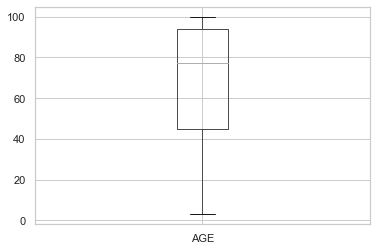

In [125]:
boston_df.boxplot('AGE')

In [126]:
# AGE no outilers use mean
imputer =SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(boston_df[['AGE']]) 
boston_df['AGE'] = imputer.transform(boston_df[['AGE']])

<AxesSubplot:>

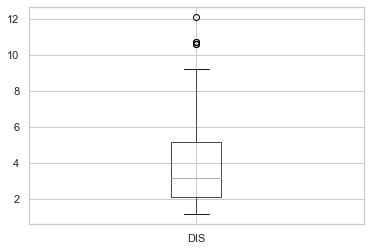

In [127]:
# Check for outliers using only the DIS feature
boston_df.boxplot('DIS')

In [128]:
# DIS outliers so use median
imputer =SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(boston_df[['DIS']]) 
boston_df['DIS'] = imputer.transform(boston_df[['DIS']])

In [129]:
boston_df.isnull().sum()

ZN         0
INDUS      0
CHAS       0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
MEDV       0
dtype: int64

# Outliers

## Histogram

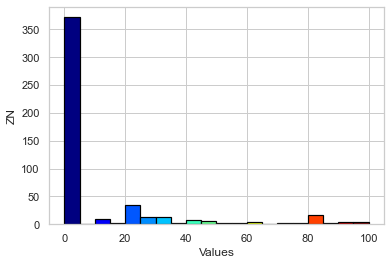

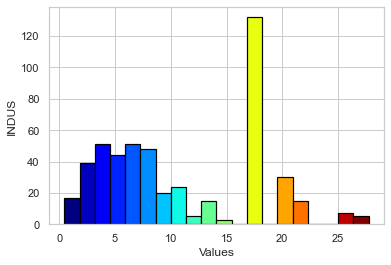

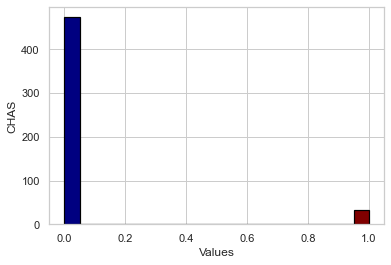

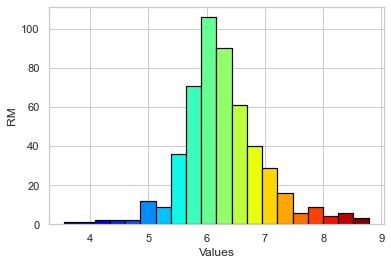

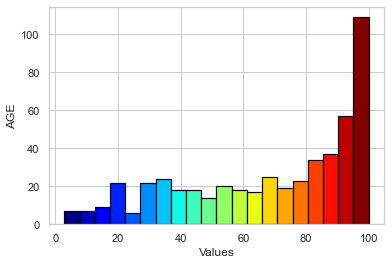

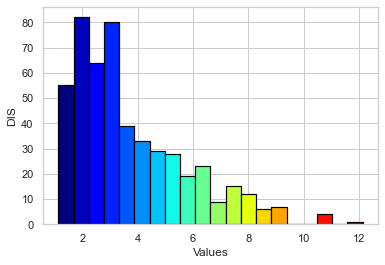

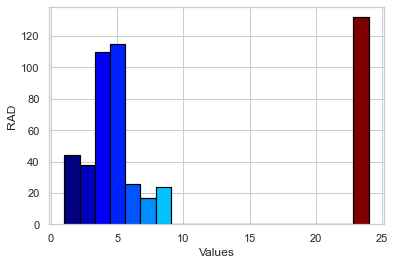

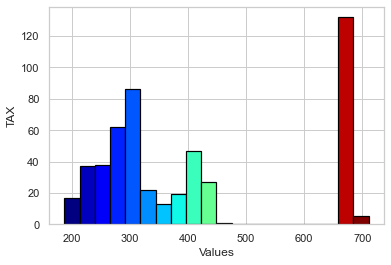

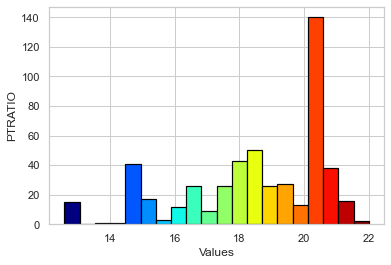

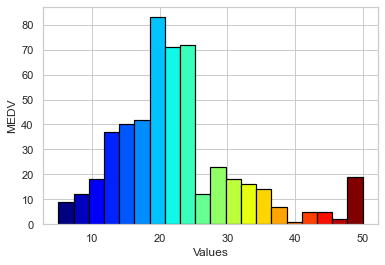

In [133]:
# Function for plotting all histograms
def show_hists(data, indx):
    n_bins = 20
    jet = plt.get_cmap('jet', n_bins)
    for ind in indx:
        s = data[data.columns[ind]].values
        plt.figure()
        _, _, patches = plt.hist(s, bins=n_bins, edgecolor='black', linewidth=1.2)
        for i in range(n_bins):
            patches[i].set_facecolor(jet(i))
        plt.xlabel('Values')
        plt.ylabel(data.columns[ind])
    plt.show()
    
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

show_hists(boston_df, indices)

## Scatter plot

Text(0, 0.5, 'TAX')

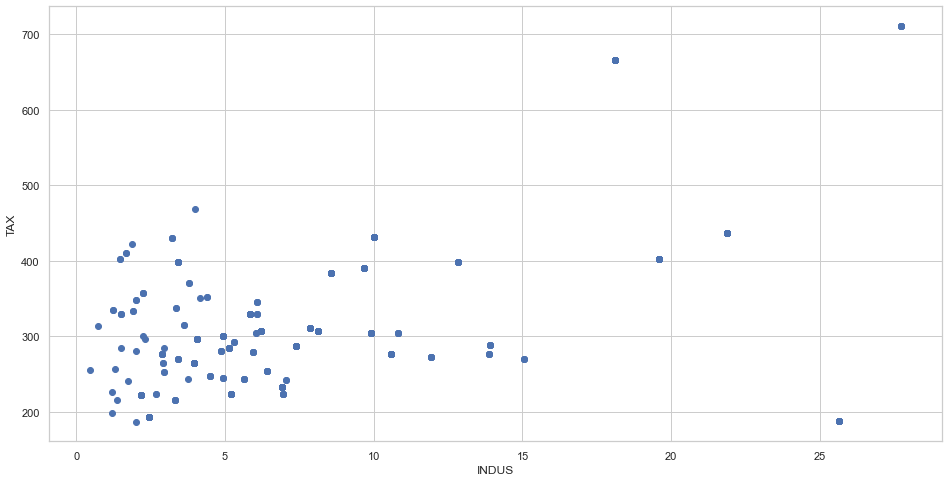

In [134]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('INDUS')
ax.set_ylabel('TAX')

Most of the data are clustered at the bottom left side and a few outlier points at the top right corner

## Scatter plot and histogram

/Users/evahegnar/opt/miniconda3/envs/pred_env/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


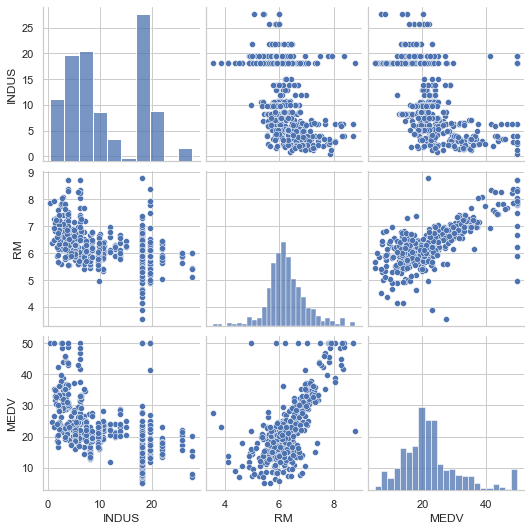

In [136]:
sns.set(style='whitegrid',context='notebook')
cols=['INDUS','RM', 'MEDV']
sns.pairplot(boston_df[cols],size=2.5)

## Feature scaling

In [137]:
standarization = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
boston_array = standarization.fit_transform(boston_df)
#boston_array = minmax_scaler.fit_transform(boston_df)
#boston_array = robust_scaler.fit_transform(boston_df)

# the fit_transform returns a ndarray so if we want a DataFrame we must transform it back
boston_df = pd.DataFrame(boston_array)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.284830,-1.287909,-0.264135,0.413672,-0.118871,0.163056,-0.982843,-0.666608,-1.459000,0.159686
1,-0.487722,-0.593381,-0.264135,0.194274,0.370466,0.590771,-0.867883,-0.987329,-0.303094,-0.101524
2,-0.487722,-0.593381,-0.264135,1.282714,-0.265314,0.590771,-0.867883,-0.987329,-0.303094,1.324247
3,-0.487722,-1.306878,-0.264135,1.016303,-0.811799,1.124794,-0.752922,-1.106115,0.113032,1.182758
4,-0.487722,-1.306878,-0.264135,1.228577,-0.511768,1.124794,-0.752922,-1.106115,0.113032,1.487503
